In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df_train = pd.read_csv('data/train_format1.csv')
user_info = pd.read_csv('data/user_info_format1.csv')
user_log = pd.read_csv('data/user_log_format1.csv')

In [5]:
user_info['age_range'].replace(0.0,np.nan,inplace=True)
user_info['gender'].replace(2.0,np.nan,inplace=True)
user_info['age_range'].replace(np.nan,-1,inplace=True)
user_info['gender'].replace(np.nan,-1,inplace=True)

Text(0.5, 1.0, 'Age Distribution (By Range)')

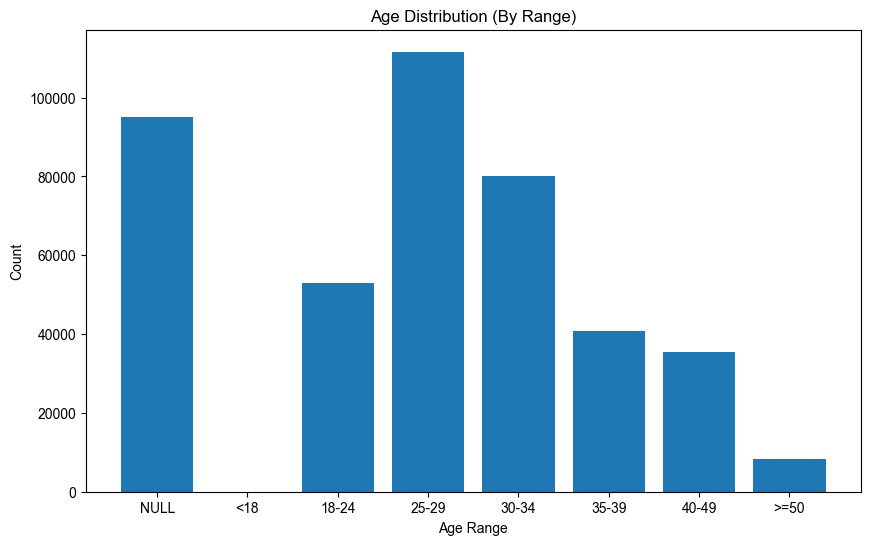

In [6]:
fig = plt.figure(figsize = (10, 6))
x = np.array(["NULL","<18","18-24","25-29","30-34","35-39","40-49",">=50"])
y = np.array([user_info[user_info['age_range'] == -1]['age_range'].count(),
             user_info[user_info['age_range'] == 1]['age_range'].count(),
             user_info[user_info['age_range'] == 2]['age_range'].count(),
             user_info[user_info['age_range'] == 3]['age_range'].count(),
             user_info[user_info['age_range'] == 4]['age_range'].count(),
             user_info[user_info['age_range'] == 5]['age_range'].count(),
             user_info[user_info['age_range'] == 6]['age_range'].count(),
             user_info[user_info['age_range'] == 7]['age_range'].count() + user_info[user_info['age_range'] == 8]['age_range'].count()])
plt.bar(x,y,label='Count')
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.title('Age Distribution (By Range)')


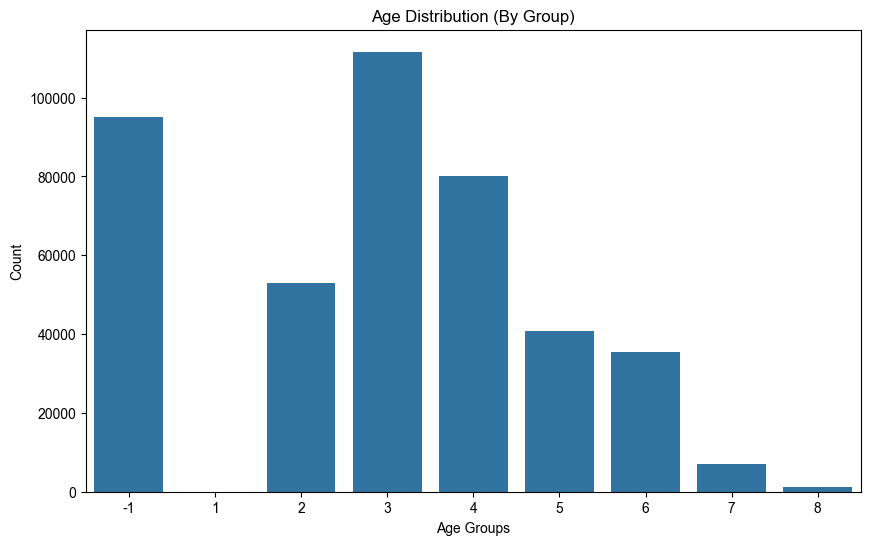

In [7]:
user_info['age_range'] = user_info['age_range'].fillna(-1).astype(int)
existing_values = sorted(user_info['age_range'].unique())
plt.figure(figsize=(10, 6))
sns.countplot(x='age_range', order=existing_values, data=user_info)
plt.xlabel("Age Groups")
plt.ylabel("Count")
plt.title("Age Distribution (By Group)")
plt.show()



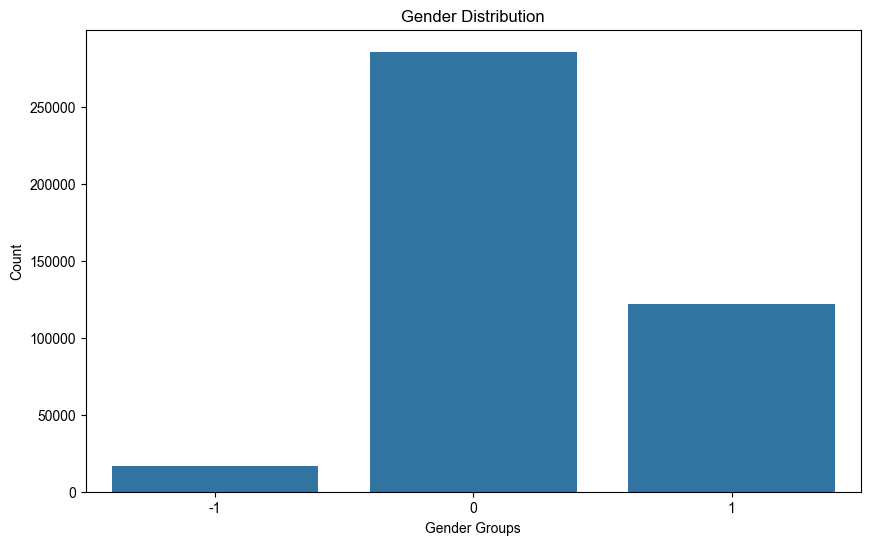

In [8]:
user_info['gender'] = user_info['gender'].fillna(-1).astype(int)
existing_values = sorted(user_info['gender'].unique())
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', order=existing_values, data=user_info)
plt.xlabel("Gender Groups")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()

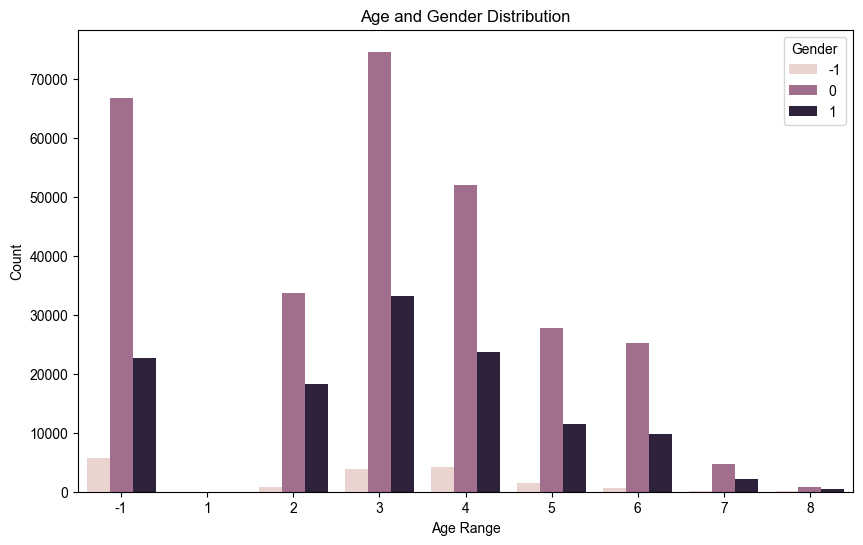

In [9]:
user_info['age_range'] = user_info['age_range'].fillna(-1).astype(int)
user_info['gender'] = user_info['gender'].fillna(-1).astype(int)
existing_values = sorted(user_info['age_range'].unique())
plt.figure(figsize=(10, 6))
sns.countplot(x='age_range', hue='gender', order=existing_values, data=user_info)
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.title("Age and Gender Distribution")
plt.legend(title="Gender")
plt.show()

In [10]:
user_info['age_range'].replace(-1,np.nan,inplace=True)
user_info['gender'].replace(-1,np.nan,inplace=True)

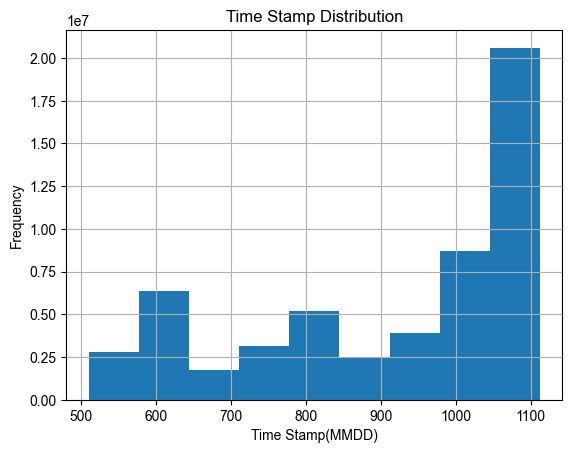

In [11]:
user_log['time_stamp'].hist(bins = 9)
plt.title("Time Stamp Distribution") 
plt.xlabel("Time Stamp(MMDD)") 
plt.ylabel("Frequency") 
plt.show()


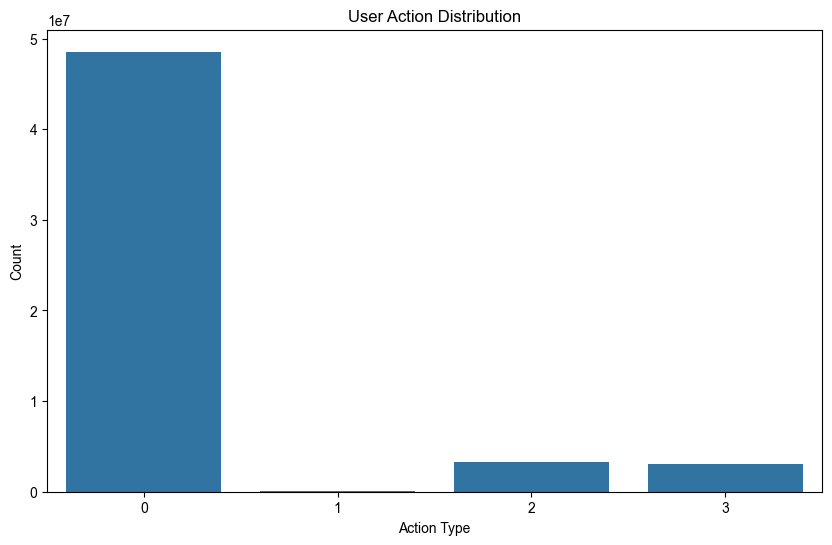

In [12]:
user_log['action_type'] = user_log['action_type'].fillna(-1).astype(int)
existing_values = sorted(user_log['action_type'].unique())
plt.figure(figsize=(10,6))
sns.countplot(x='action_type', order=existing_values, data=user_log)
plt.xlabel("Action Type")
plt.ylabel("Count")
plt.title("User Action Distribution")
plt.show()

In [13]:
# df_train[df_train['label'] == 1]

In [14]:
# user_log[(user_log['user_id'] == 34176) & (user_log['seller_id'] == 3906)]

In [15]:
# df_train.head()
# user_info.head()
# user_log.head()

In [16]:
df_train = pd.merge(df_train,user_info,on="user_id",how="left")
# df_train.head()

In [17]:
total_logs_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"]]).count().reset_index()[["user_id","seller_id","item_id"]]
# total_logs_temp.head(10)

In [18]:
total_logs_temp.rename(columns={"seller_id":"merchant_id","item_id":"total_logs"},inplace=True)
# total_logs_temp.head()

In [19]:
df_train = pd.merge(df_train,total_logs_temp,on=["user_id","merchant_id"],how="left")
# df_train.head()

In [20]:
unique_item_ids_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"],user_log["item_id"]]).count().reset_index()[["user_id","seller_id","item_id"]]
# unique_item_ids_temp.head(10)

In [21]:
unique_item_ids_temp1 = unique_item_ids_temp.groupby([unique_item_ids_temp["user_id"],unique_item_ids_temp["seller_id"]]).count().reset_index()
# unique_item_ids_temp1.head(10)

In [22]:
unique_item_ids_temp1.rename(columns={"seller_id":"merchant_id","item_id":"unique_item_ids"},inplace=True)
# unique_item_ids_temp1.head(10)

In [23]:
df_train = pd.merge(df_train,unique_item_ids_temp1,on=["user_id","merchant_id"],how="left")
# df_train.head()

In [24]:
categories_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"],user_log["cat_id"]]).count().reset_index()[["user_id","seller_id","cat_id"]]
# categories_temp.head(20)

In [25]:
categories_temp1 = categories_temp.groupby([categories_temp["user_id"],categories_temp["seller_id"]]).count().reset_index()
# categories_temp1.head(10)

In [26]:
categories_temp1.rename(columns={"seller_id":"merchant_id","cat_id":"categories"},inplace=True)
# categories_temp1.head(10)

In [27]:
df_train = pd.merge(df_train,categories_temp1,on=["user_id","merchant_id"],how="left")
# df_train.head(10)

In [28]:
browse_days_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"],user_log["time_stamp"]]).count().reset_index()[["user_id","seller_id","time_stamp"]]
# browse_days_temp.head(10)

In [29]:
browse_days_temp1 = browse_days_temp.groupby([browse_days_temp["user_id"],browse_days_temp["seller_id"]]).count().reset_index()
# browse_days_temp1.head(10)

In [30]:
browse_days_temp1.rename(columns={"seller_id":"merchant_id","time_stamp":"browse_days"},inplace=True)
# browse_days_temp1.head(10)

In [31]:
df_train = pd.merge(df_train,browse_days_temp1,on=["user_id","merchant_id"],how="left")
# df_train.head(10)


In [32]:
one_clicks_temp = user_log.groupby([user_log["user_id"],user_log["seller_id"],user_log["action_type"]]).count().reset_index()[["user_id","seller_id","action_type","item_id"]]
# one_clicks_temp.head(10)

In [33]:
one_clicks_temp.rename(columns={"seller_id":"merchant_id","item_id":"times"},inplace=True)
# one_clicks_temp.head(10)

In [34]:
one_clicks_temp["one_clicks"] = one_clicks_temp["action_type"] == 0
one_clicks_temp["one_clicks"] = one_clicks_temp["one_clicks"] * one_clicks_temp["times"]
# one_clicks_temp.head(10)

In [35]:
one_clicks_temp["shopping_carts"] = one_clicks_temp["action_type"] == 1
one_clicks_temp["shopping_carts"] = one_clicks_temp["shopping_carts"] * one_clicks_temp["times"]
# one_clicks_temp.head(10)

In [36]:
one_clicks_temp["purchase_times"] = one_clicks_temp["action_type"] == 2
one_clicks_temp["purchase_times"] = one_clicks_temp["purchase_times"] * one_clicks_temp["times"]
# one_clicks_temp.head(10)

In [37]:
one_clicks_temp["favourite_times"] = one_clicks_temp["action_type"] == 3
one_clicks_temp["favourite_times"] = one_clicks_temp["favourite_times"] * one_clicks_temp["times"]
# one_clicks_temp.head(10)

In [38]:
four_features = one_clicks_temp.groupby([one_clicks_temp["user_id"],one_clicks_temp["merchant_id"]]).sum().reset_index()
# four_features.head(10)

In [39]:
four_features = four_features.drop(["action_type","times"], axis=1)
df_train = pd.merge(df_train,four_features,on=["user_id","merchant_id"],how="left")
# df_train.head(10)

In [40]:
df_train.isnull().sum(axis=0)


user_id                0
merchant_id            0
label                  0
age_range          57062
gender             10694
total_logs             0
unique_item_ids        0
categories             0
browse_days            0
one_clicks             0
shopping_carts         0
purchase_times         0
favourite_times        0
dtype: int64

In [41]:
df_train = df_train.ffill()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_id          260864 non-null  int64  
 1   merchant_id      260864 non-null  int64  
 2   label            260864 non-null  int64  
 3   age_range        260864 non-null  float64
 4   gender           260864 non-null  float64
 5   total_logs       260864 non-null  int64  
 6   unique_item_ids  260864 non-null  int64  
 7   categories       260864 non-null  int64  
 8   browse_days      260864 non-null  int64  
 9   one_clicks       260864 non-null  int64  
 10  shopping_carts   260864 non-null  int64  
 11  purchase_times   260864 non-null  int64  
 12  favourite_times  260864 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 25.9 MB


Text(0, 0.5, 'Count')

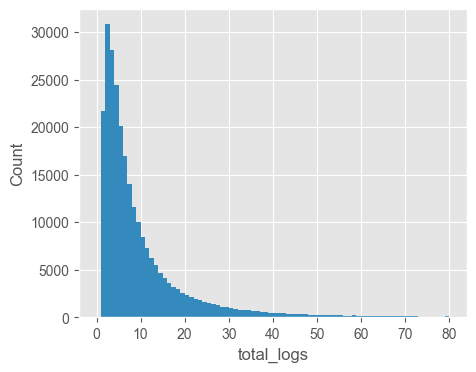

In [43]:
colnm = df_train.columns.tolist()
plt.figure(figsize = (5, 4))
color = sns.color_palette()

df_train[colnm[5]].hist(range=[0,80],bins = 80,color = color[1])
plt.xlabel(colnm[5],fontsize = 12)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

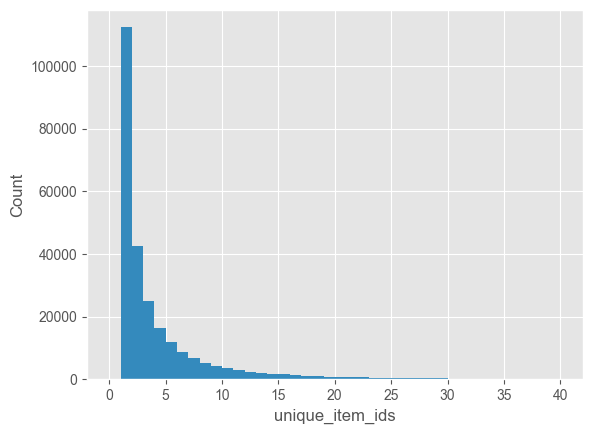

In [44]:
df_train[colnm[6]].hist(range=[0,40],bins = 40,color = color[1])
plt.xlabel(colnm[6],fontsize = 12)
plt.ylabel('Count')


Text(0, 0.5, 'Count')

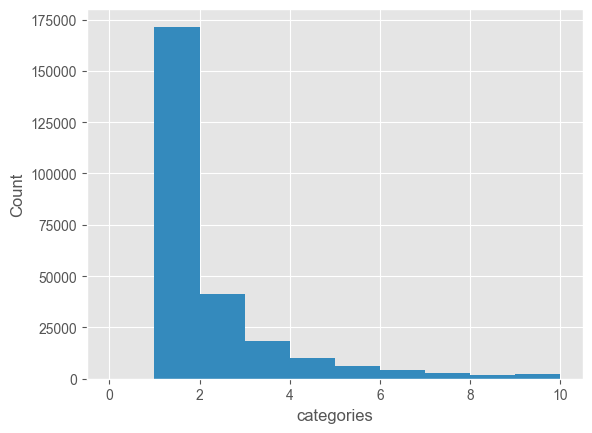

In [45]:
df_train[colnm[7]].hist(range=[0,10],bins = 10,color = color[1])
plt.xlabel(colnm[7],fontsize = 12)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

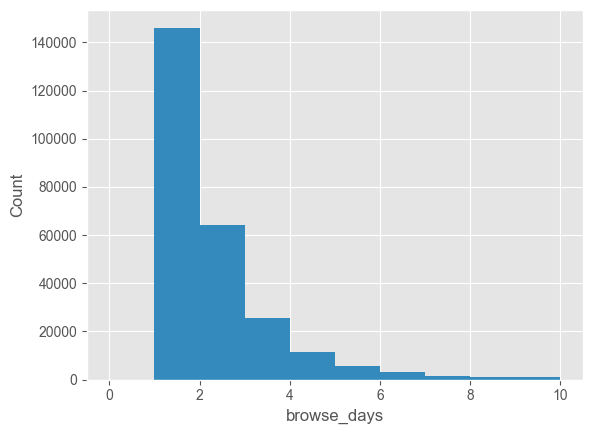

In [46]:
df_train[colnm[8]].hist(range=[0,10],bins = 10,color = color[1])
plt.xlabel(colnm[8],fontsize = 12)
plt.ylabel('Count')

Text(0, 0.5, 'One_clicks Count')

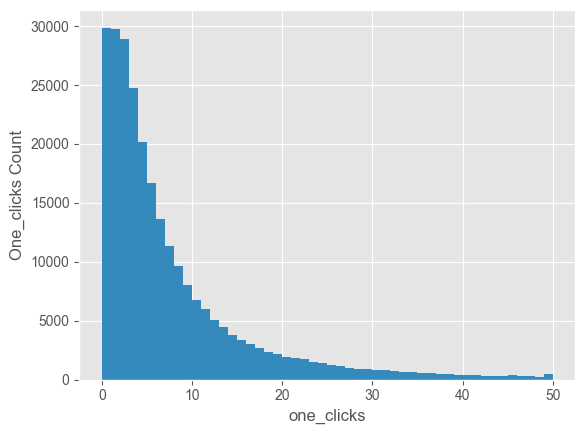

In [47]:
df_train[colnm[9]].hist(range=[0,50],bins = 50,color = color[1])
plt.xlabel(colnm[9],fontsize = 12)
plt.ylabel('One_clicks Count')

Text(0, 0.5, 'Count')

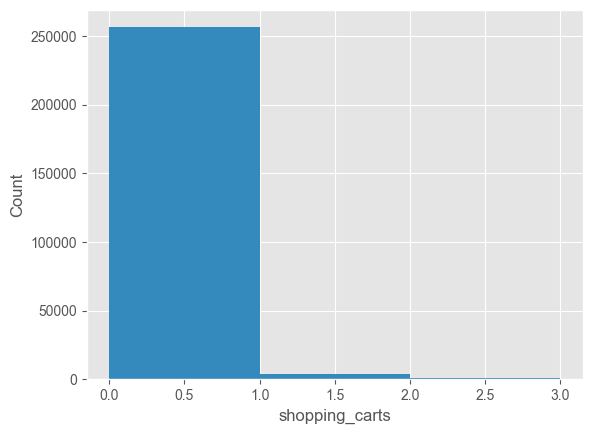

In [48]:
df_train[colnm[10]].hist(range=[0,3],bins = 3,color = color[1])
plt.xlabel(colnm[10],fontsize = 12)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

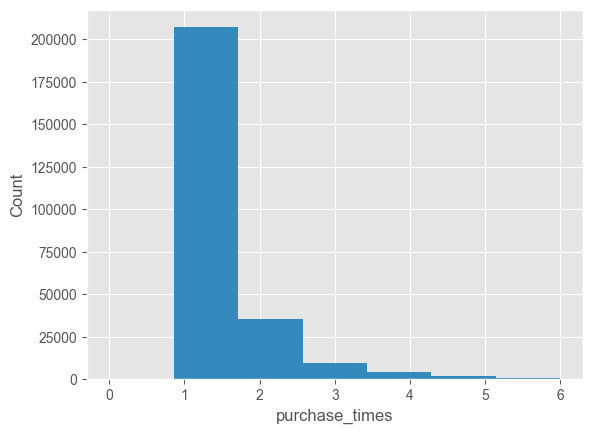

In [49]:
df_train[colnm[11]].hist(range=[0,6],bins = 7,color = color[1])
plt.xlabel(colnm[11],fontsize = 12)
plt.ylabel("Count")

Text(0, 0.5, 'Count')

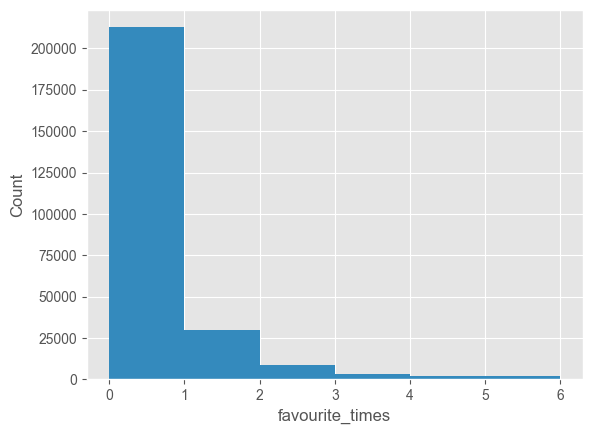

In [50]:
df_train[colnm[12]].hist(range=[0,6],bins = 6,color = color[1])
plt.xlabel(colnm[12],fontsize = 12)
plt.ylabel("Count")

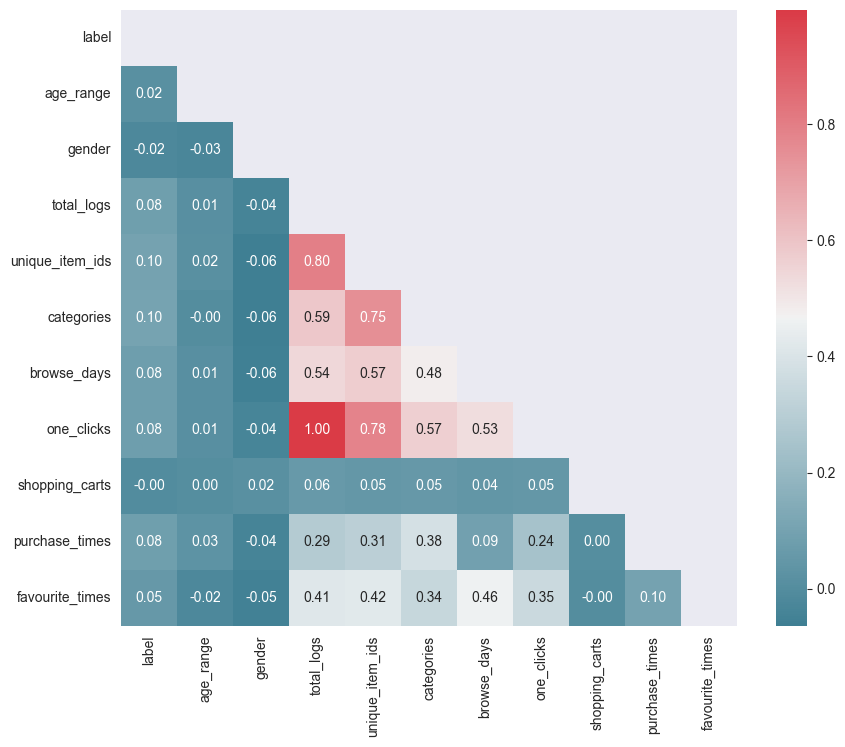

In [51]:
sns.set_style("dark")

plt.figure(figsize = (10,8))
colnm = df_train.columns.tolist()[2:13]
mcorr = df_train[colnm].corr()
mask = np.zeros_like(mcorr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True,fmt='0.2f')

In [52]:
train_df, test_df = train_test_split(df_train, test_size=0.2, random_state=42)
train_df.to_csv("data/train_set.csv", index=False)
test_df.to_csv("data/test_set.csv", index=False)
